In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset







In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mental-Health-Twitter.csv")

In [ ]:
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


**Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
#describe to numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20000.0,9.999500e+03,5.773647e+03,0.000000e+00,4.999750e+03,9.999500e+03,1.499925e+04,1.999900e+04
post_id,20000.0,6.874728e+17,1.708396e+17,3.555966e+09,5.931686e+17,7.637400e+17,8.153124e+17,8.194574e+17
user_id,20000.0,3.548623e+16,1.606083e+17,1.472438e+07,3.242944e+08,1.052122e+09,2.285923e+09,7.631825e+17
followers,20000.0,9.004840e+02,1.899914e+03,0.000000e+00,1.770000e+02,4.760000e+02,1.197000e+03,2.861400e+04
friends,20000.0,7.824288e+02,1.834818e+03,0.000000e+00,2.110000e+02,5.610000e+02,7.010000e+02,2.851400e+04
favourites,20000.0,6.398236e+03,8.393073e+03,0.000000e+00,2.430000e+02,2.752000e+03,8.229000e+03,3.900800e+04
statuses,20000.0,4.439442e+04,1.407785e+05,3.000000e+00,5.129000e+03,1.325100e+04,5.289200e+04,1.063601e+06
retweets,20000.0,1.437927e+03,1.511967e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.395400e+05
label,20000.0,5.000000e-01,5.000125e-01,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(20000, 11)

Dropping Duplicate Rows

In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [ ]:
df.shape

(20000, 11)

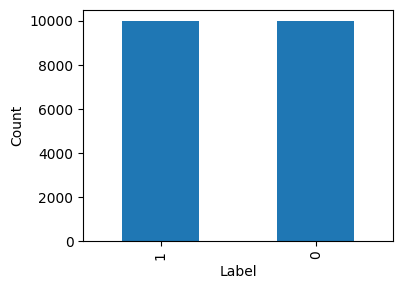

In [ ]:
#Checking wheteher data is imbalanced or not.
# Calculate the counts of each label
label_counts = df['label'].value_counts()

# Plot the label imbalance
plt.figure(figsize=(4, 3))
label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Inference : Data is balanced.

Checking Null values.

In [ ]:
# Calculate the percentage of NaN values in each column
NAN = [(c, df[c].isna().mean() * 100) for c in df.columns]

# Convert the list to a DataFrame
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

# Print the NaN percentages
print(NAN)


     column_name  percentage
0     Unnamed: 0         0.0
1        post_id         0.0
2   post_created         0.0
3      post_text         0.0
4        user_id         0.0
5      followers         0.0
6        friends         0.0
7     favourites         0.0
8       statuses         0.0
9       retweets         0.0
10         label         0.0


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("post_id", axis=1, inplace=True)
df.drop("user_id", axis=1, inplace=True)

Feature  Extraction

In [ ]:
df.post_created=df.post_created.apply(pd.to_datetime)

df["month"]=df.post_created.dt.month
df["year"]=df.post_created.dt.year

df.drop("post_created", axis=1, inplace=True)

In [ ]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015


Correlation

In [ ]:
# Exclude "Month" and "Year" columns from the correlation calculation
df_subset = df.drop(columns=['month', 'year'])
df_subset.corr()

<ipython-input-14-011c7b2deeb9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_subset.corr()


,followers,friends,favourites,statuses,retweets,label
followers,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


<ipython-input-15-95a8d51b594a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_subset.corr()


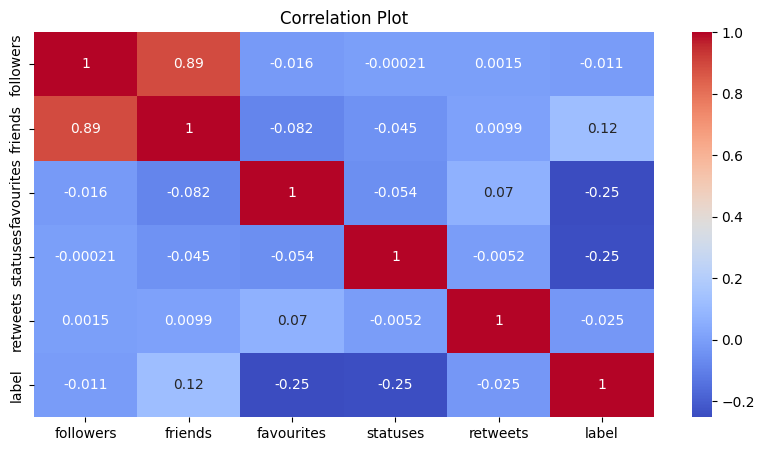

In [ ]:
# Exclude "Month" and "Year" columns from the correlation calculation
df_subset = df.drop(columns=['month', 'year'])

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()


# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

**Text Preprocessing**

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split())) #converting to lower case

In [ ]:
df["post_text"] = df["post_text"].str.replace("\d","")   #removing numerical values

<ipython-input-18-15ca4c19b9e2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("\d","")   #removing numerical values


In [ ]:
df["post_text"] = df["post_text"].str.replace("[^\w\s]","") #removing punctuations

<ipython-input-19-035f869043ee>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("[^\w\s]","") #removing punctuations


In [ ]:
df

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,its just over years since i was diagnosed wit...,84,211,251,837,0,1,8,2015
1,its sunday i need a break so im planning to sp...,84,211,251,837,1,1,8,2015
2,awake but tired i need to sleep but my brain h...,84,211,251,837,0,1,8,2015
3,rt sewhq retro bears make perfect gifts and ar...,84,211,251,837,2,1,8,2015
4,its hard to say whether packing lists are maki...,84,211,251,837,1,1,8,2015
...,...,...,...,...,...,...,...,...,...
19995,a day without sunshine is like night,442,230,7,1063601,0,0,1,2017
19996,borens laws when in charge ponder when in tr...,442,230,7,1063601,0,0,1,2017
19997,the flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,1,2017
19998,ships are safe in harbor but they were never m...,442,230,7,1063601,0,0,1,2017


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015
...,...,...,...,...,...,...,...,...,...
19995,day without sunshine like night,442,230,7,1063601,0,0,1,2017
19996,borens laws charge ponder trouble delegate dou...,442,230,7,1063601,0,0,1,2017
19997,flow chart thoroughly oversold piece program d...,442,230,7,1063601,0,0,1,2017
19998,ships safe harbor never meant stay,442,230,7,1063601,0,0,1,2017


Lemmatization

In [ ]:
import textblob
from textblob import TextBlob
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Frequency Analysis

In [ ]:
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" ")))   #no of words in each posts
df["frequency"]

0        14
1         9
2         6
3        16
4        14
         ..
19995     5
19996     8
19997    13
19998     6
19999     5
Name: frequency, Length: 20000, dtype: int64

In [ ]:
#df.groupby("frequency").max()
#df[df["post_text"].str.contains("sos unique")]
#longest_comment=df.iloc[3038,0]
#print(longest_comment)

In [ ]:
longest_comment_index = df["post_text"].str.len().idxmax()
longest_comment = df.loc[longest_comment_index, "post_text"]
print(longest_comment)

rt sos unique new york unique new york unique new york unique new york unique new york unique new york unique new york unique new york u


In [ ]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14


In [ ]:
#nltk.download('averaged_perceptron_tagger')
#TextBlob(longest_comment).tags

Data Visualisation

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
text = " ".join(i for i in df.post_text)

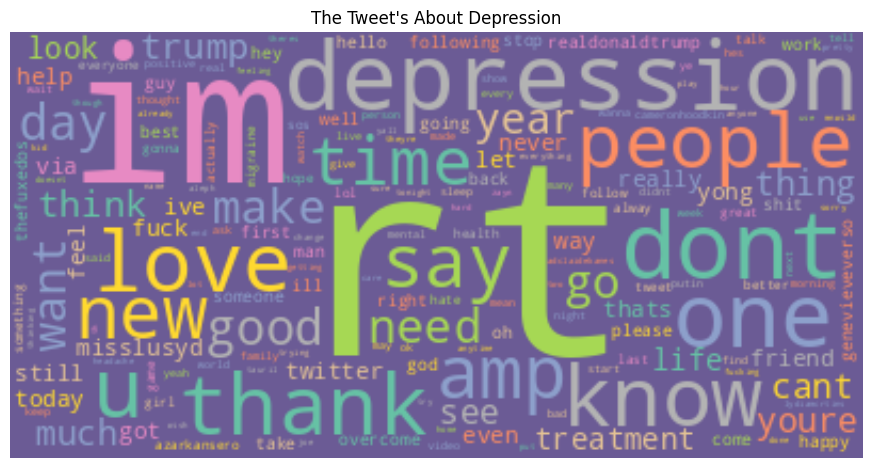

In [ ]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [ ]:
print("\n",
      "\n rt :",text.count("rt"),
      "\n im :",text.count("im"),
      "\n one :",text.count("one"),
      "\n depression :",text.count("depression"),
      "\n dont :",text.count("dont"),
      "\n time :",text.count("time"),
      "\n love :",text.count("love"),
      "\n know :",text.count("know"),
      "\n thank :",text.count("thank"),
      "\n people :",text.count("people"),
     )


 
 rt : 6630 
 im : 3328 
 one : 2063 
 depression : 950 
 dont : 887 
 time : 785 
 love : 754 
 know : 729 
 thank : 702 
 people : 593


In [ ]:

data = {
    "title": ["rt", "im" ,"one", "depression", "dont", "time",
              "love","know","thank", "people"],
    "count": [6630, 3328 ,2063, 950, 887, 785, 754, 729, 702, 593],
}

In [ ]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,rt,6630
1,im,3328
2,one,2063
3,depression,950
4,dont,887
5,time,785
6,love,754
7,know,729
8,thank,702
9,people,593


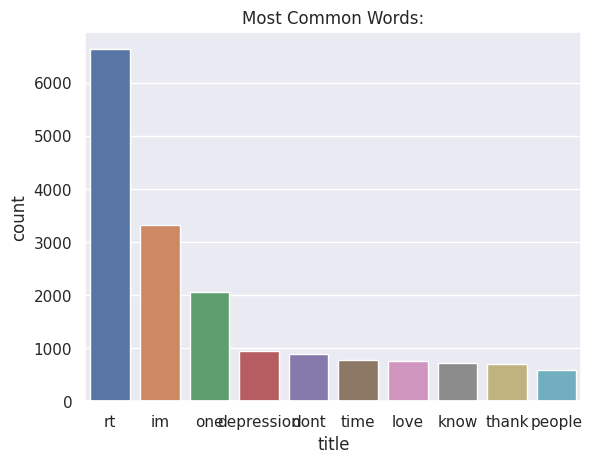

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

# Display the plot
plt.show()

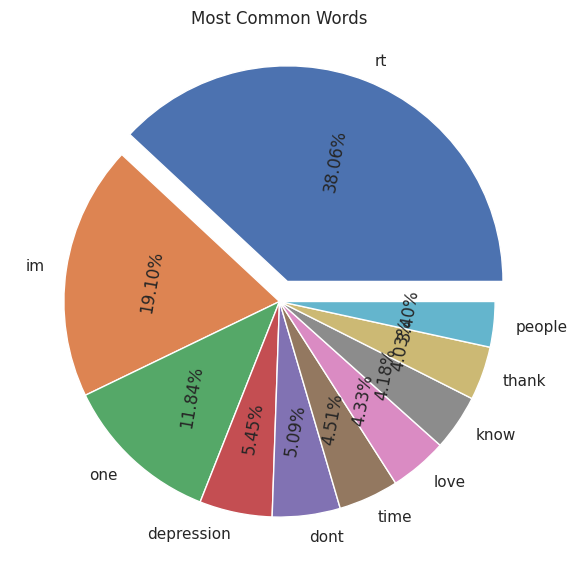

In [ ]:
# Create the pie chart
fig = plt.figure(figsize=(10, 7))
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
patches, texts, autotexts = plt.pie(data["count"], labels=data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

# Rotate percentage labels
for autotext in autotexts:
    autotext.set_rotation(80)

# Display the plot
plt.show()

In [ ]:
df.groupby("month").count()

,post_text,followers,friends,favourites,statuses,retweets,label,year,tokens,frequency
month,,,,,,,,,,
1,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118
2,435,435,435,435,435,435,435,435,435,435
3,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
4,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
5,644,644,644,644,644,644,644,644,644,644
6,8,8,8,8,8,8,8,8,8,8
7,359,359,359,359,359,359,359,359,359,359
8,659,659,659,659,659,659,659,659,659,659
9,639,639,639,639,639,639,639,639,639,639


Tweets frequency per month

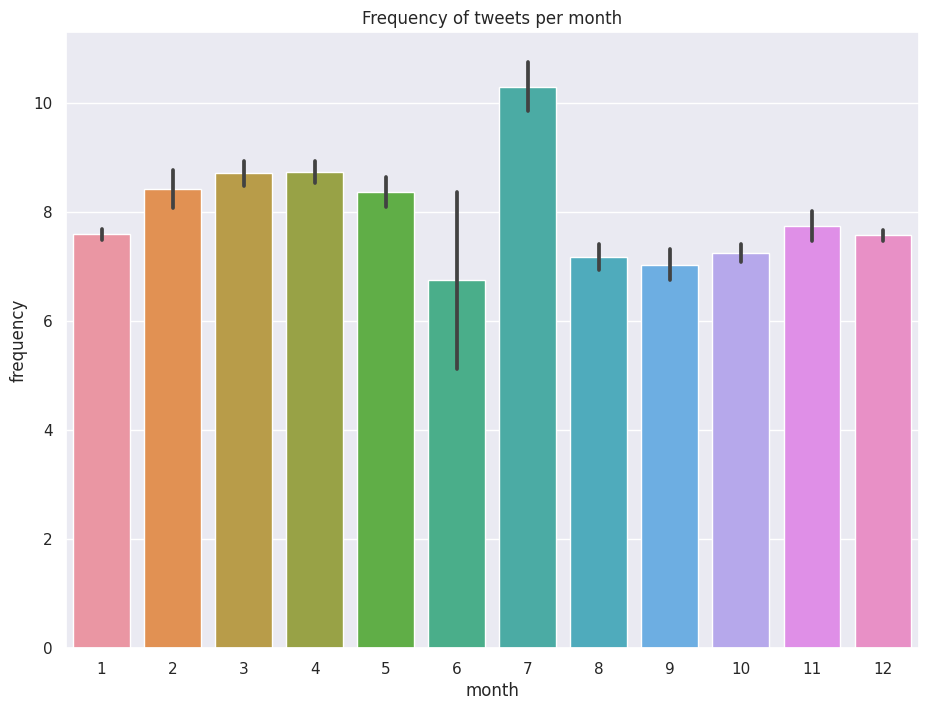

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="frequency").set(title="Frequency of tweets per month");

Tweets frequency per year

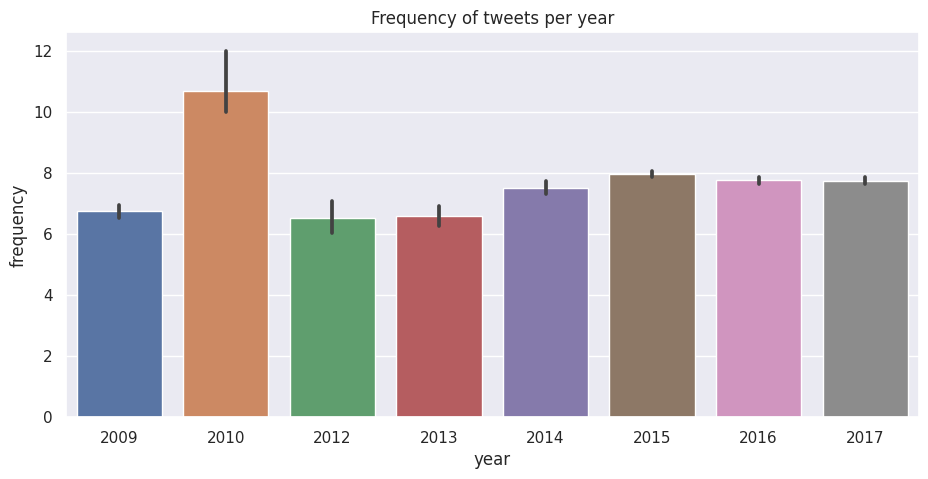

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="frequency").set(title="Frequency of tweets per year");

Followers per month

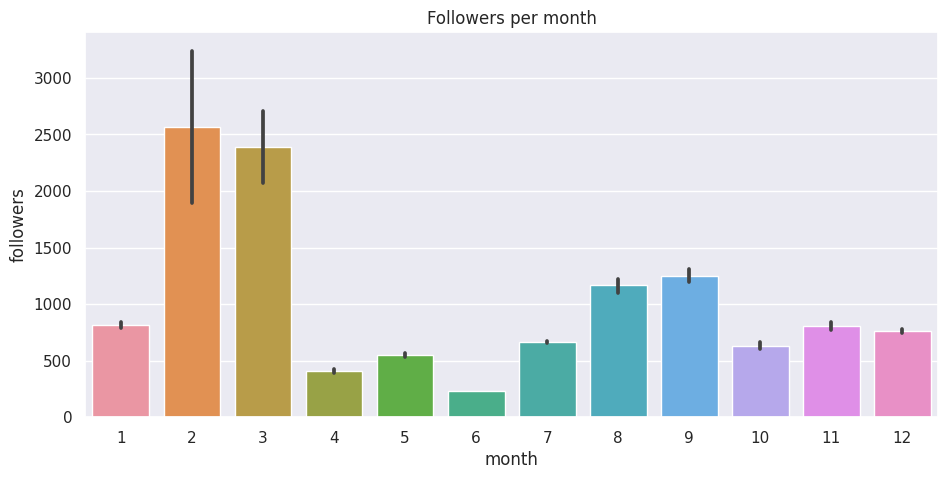

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="followers").set(title="Followers per month");

Followers per year

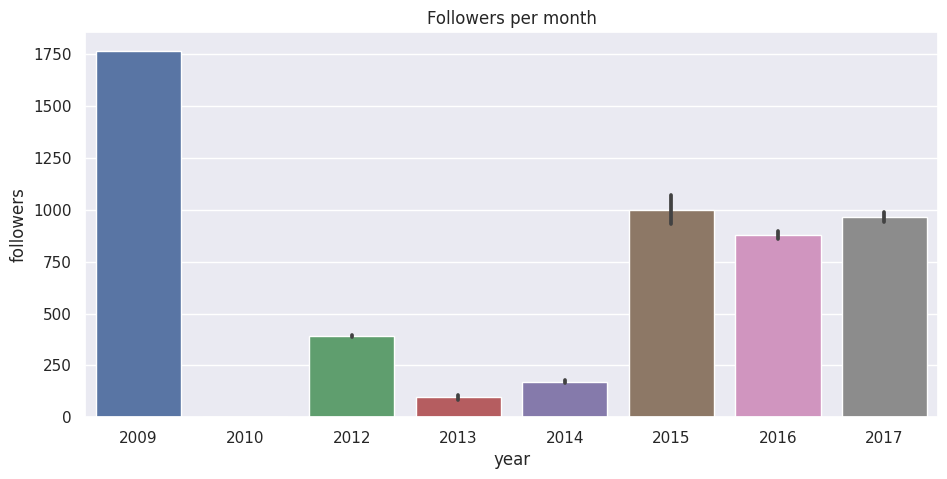

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="followers").set(title="Followers per month");

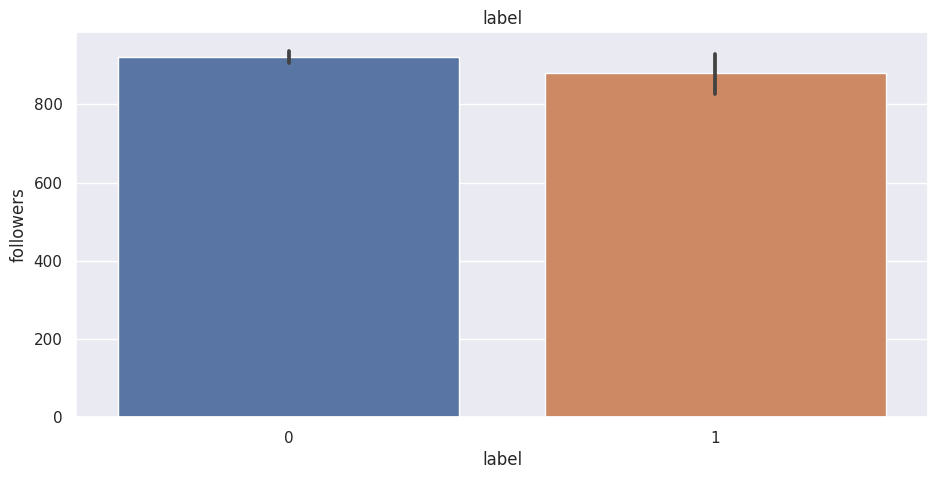

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .2, rc={"grid.linewidth": 0.3})
sns.set(rc = {'figure.figsize':(9,3)})
sns.barplot(data=df, x="label", y="followers").set(title="label");

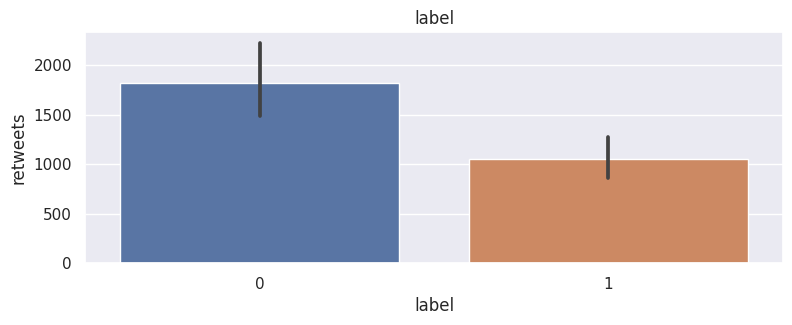

In [ ]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="label", y="retweets").set(title="label");

Retweets/favourites

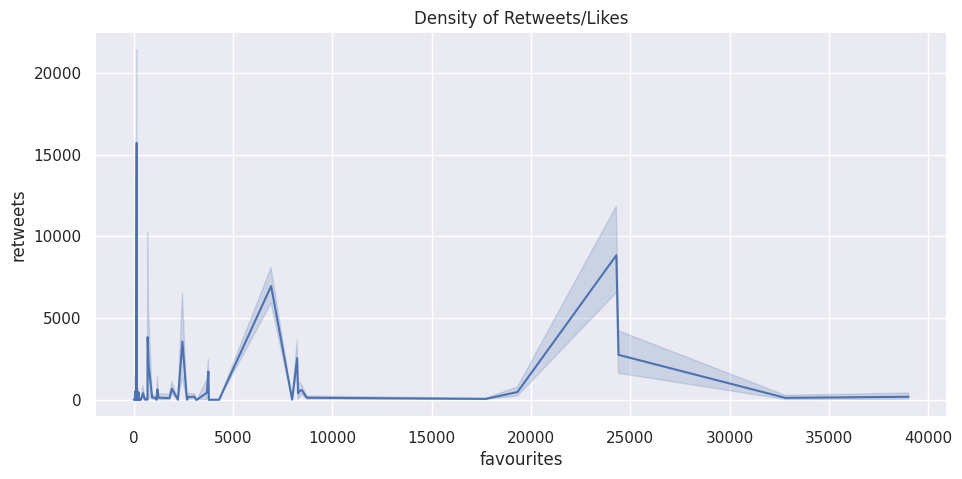

In [ ]:
sns.lineplot(data=df, x="favourites", y="retweets").set(title="Density of Retweets/Likes");

Density of retweets/likes

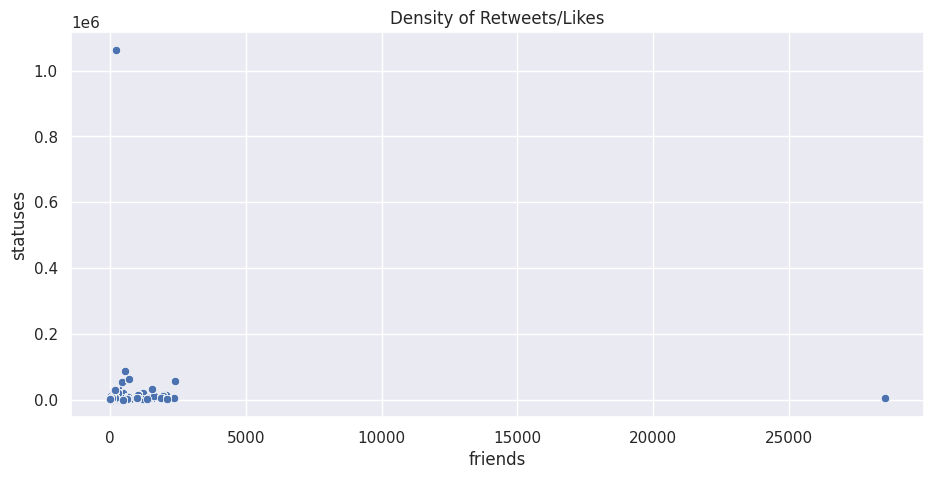

In [ ]:
sns.scatterplot(data=df, x="friends", y="statuses",).set(title="Density of Retweets/Likes");

In [ ]:
len(df[df["label"]==0]), len(df[df["label"]==1])

(10000, 10000)

MODEL DEVELOPMENT AND EVALUATION

Splitting into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

x= df["post_text"]
y = df["label"].astype("int")
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(ngram_range=(1,3))
tf = TfidfVectorizer(ngram_range=(1,3))
x1 = cv.fit_transform(x_train)
x2 = tf.fit_transform(x_train)

In [ ]:
from sklearn import metrics

accuracy = {}
model = {}
vectorizer = {"CountVectorizer":cv,"TfidfVectorizer":tf}

In [ ]:
from tabulate import tabulate

accuracy_table = []


Support Vector Machine

CountVectorizer

In [ ]:
from sklearn import svm

classifier=svm.SVC()
classifier.fit(x1,y_train)
y_predict1=classifier.predict(cv.transform(x_test))
k = "Support Vector Machine with CountVectorizer"
model[k]=classifier

In [ ]:
b1=metrics.accuracy_score(y_test, y_predict1)
recall = metrics.recall_score(y_test, y_predict1)
accuracy[k] = float("{0:.4f}".format(b1))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["SVM-cv", b1, recall])


Support Vector Machine with CountVectorizer
Accuracy:  0.8033
Recall  : 0.7831


TfidfVectorizer

In [ ]:
classifier=svm.SVC()
classifier.fit(x2,y_train)
y_predict2=classifier.predict(tf.transform(x_test))
k = "Support Vector Machine with TfidfVectorizer"
model[k]=classifier

In [ ]:
b2=metrics.accuracy_score(y_test, y_predict2)
recall = metrics.recall_score(y_test, y_predict2)
accuracy[k] = float("{0:.4f}".format(b2))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["SVM-tfidf", b2, recall])

Support Vector Machine with TfidfVectorizer
Accuracy:  0.8255
Recall  : 0.8955


Binomial Naive Bayes

Count Vectorizer

In [ ]:
from sklearn.naive_bayes import BernoulliNB


nb = BernoulliNB()
nb.fit(x1,y_train)
y_predict3=classifier.predict(cv.transform(x_test))
k = "Binomial Naive Bayes with CountVectorizer"
model[k]=nb

In [ ]:
b3=metrics.accuracy_score(y_test, y_predict3)
recall = metrics.recall_score(y_test, y_predict3)
accuracy[k] = float("{0:.4f}".format(b3))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["BNB-cv", b3, recall])


Binomial Naive Bayes with CountVectorizer
Accuracy:  0.4935
Recall  : 0.0471


TfidfVectorizer

In [ ]:
nb = BernoulliNB()
nb.fit(x2,y_train)
y_predict4=classifier.predict(tf.transform(x_test))
k = "Binomial Naive Bayes with TfidfVectorizer"
model[k]=nb


In [ ]:
b4=metrics.accuracy_score(y_test,y_predict4)
recall = metrics.recall_score(y_test, y_predict4)
accuracy[k] = float("{0:.4f}".format(b4))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["BNB-tfidf", b4, recall])


Binomial Naive Bayes with TfidfVectorizer
Accuracy:  0.8255
Recall  : 0.8955


Decision Tree Classifier

CountVectorizer

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x1,y_train)
y_pred1 = dtc.predict(cv.transform(x_test))
k = "Decision Tree Classifier with CountVectorizer"
model[k]=dtc

In [ ]:
a1 = metrics.accuracy_score(y_test, y_pred1)
recall = metrics.recall_score(y_test, y_pred1)
accuracy[k] = a1
print(k)
print("Accuracy: {0:.4f}".format(a1))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["DT-cv", a1, recall])


Decision Tree Classifier with CountVectorizer
Accuracy: 0.7472
Recall  : 0.8202


TfidfVectorizer

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x2,y_train)
y_pred2 = dtc.predict(tf.transform(x_test))
k = "Decision Tree Classifier with TfidfVectorizer"
model[k]=dtc

In [ ]:
a2 = metrics.accuracy_score(y_test, y_pred2)
recall = metrics.recall_score(y_test, y_pred2)
accuracy[k] = a2
print(k)
print("Accuracy: {0:.4f}".format(a2))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["DT-tfidf", a2, recall])


Decision Tree Classifier with TfidfVectorizer
Accuracy: 0.7188
Recall  : 0.8593


**Random Forest Classifier**

CountVectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x1,y_train)
y_pred3 = rfc.predict(cv.transform(x_test))
k = "Random Forest Classifier with CountVectorizer"
model[k]=rfc

In [ ]:
a3 = metrics.accuracy_score(y_test, y_pred3)
recall = metrics.recall_score(y_test, y_pred3)
accuracy[k] = a3
print(k)
print("Accuracy: {0:.4f}".format(a3))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["rf-cv", a3, recall])


Random Forest Classifier with CountVectorizer
Accuracy: 0.7903
Recall  : 0.8474


TfidfVectorizer

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x2,y_train)
y_pred4 = rfc.predict(tf.transform(x_test))
k = "Random Forest Classifier with TfidfVectorizer"
model[k]=rfc

In [ ]:
a4 = metrics.accuracy_score(y_test, y_pred4)
recall = metrics.recall_score(y_test, y_pred4)
accuracy[k] = a4
print(k)
print("Accuracy: {0:.4f}".format(a4))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["rf-tfidf", a4, recall])


Random Forest Classifier with TfidfVectorizer
Accuracy: 0.7640
Recall  : 0.9178


K Nearest Neighbors

CountVectorizer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x1,y_train)
Y_pred1 = classifier.predict(cv.transform(x_test))
k = "KNeighborsClassifier with CountVectorizer"
model[k]=classifier

In [ ]:
c1 = metrics.accuracy_score(y_test, Y_pred1)
recall = metrics.recall_score(y_test, Y_pred1)
accuracy[k] = c1
print(k)
print("Accuracy: {0:.4f}".format(c1))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["KNN-cv", c1, recall])


KNeighborsClassifier with CountVectorizer
Accuracy: 0.5447
Recall  : 0.9916


TfidfVectorizer

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x2,y_train)
Y_pred2 = classifier.predict(tf.transform(x_test))
k = "KNeighborsClassifier with TfidfVectorizer"
model[k]=classifier

In [ ]:
c2 = metrics.accuracy_score(y_test, Y_pred2)
recall = metrics.recall_score(y_test, Y_pred2)
accuracy[k] = c2
print(k)
print("Accuracy: {0:.4f}".format(c2))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["KNN-tfidf", c2, recall])


KNeighborsClassifier with TfidfVectorizer
Accuracy: 0.5383
Recall  : 1.0000


Logistic Regression

CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x1,y_train)
Y_pred3 = lr.predict(cv.transform(x_test))
k = "Logistic Regression with CountVectorizer"
model[k]=lr

In [ ]:
c3 = metrics.accuracy_score(y_test, Y_pred3)
recall = metrics.recall_score(y_test, Y_pred3)
accuracy[k] = c3
print(k)
print("Accuracy: {0:.4f}".format(c3))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["lr-cv", c3, recall])


Logistic Regression with CountVectorizer
Accuracy: 0.8470
Recall  : 0.8385


TfidfVectorizer

In [ ]:
lr = LogisticRegression()
lr.fit(x2,y_train)
Y_pred4 = lr.predict(tf.transform(x_test))
k = "Logistic Regression with TfidfVectorizer"
model[k]=lr

In [ ]:
c4 = metrics.accuracy_score(y_test, Y_pred4)
recall = metrics.recall_score(y_test, Y_pred4)
accuracy[k] = c4
print(k)
print("Accuracy: {0:.4f}".format(c4))
print("Recall  : {0:.4f}".format(recall))

accuracy_table.append(["Lr-tfidf", c4, recall])


Logistic Regression with TfidfVectorizer
Accuracy: 0.8420
Recall  : 0.8816


In [ ]:
sorted(accuracy)
ad = pd.DataFrame({"Accuracy":accuracy})
ad

,Accuracy
Binomial Naive Bayes with CountVectorizer,0.49350
Binomial Naive Bayes with TfidfVectorizer,0.82550
Decision Tree Classifier with CountVectorizer,0.74725
Decision Tree Classifier with TfidfVectorizer,0.71875
KNeighborsClassifier with CountVectorizer,0.54475
KNeighborsClassifier with TfidfVectorizer,0.53825
Logistic Regression with CountVectorizer,0.84700
Logistic Regression with TfidfVectorizer,0.84200
Random Forest Classifier with CountVectorizer,0.79025
Random Forest Classifier with TfidfVectorizer,0.76400


In [ ]:
m = max(accuracy,key=accuracy.get)
a = accuracy[m]
print("The model with highest accuracy is",m,"with an Accuracy of","{:.2f}".format(a*100),"%")

The model with highest accuracy is Logistic Regression with CountVectorizer with an Accuracy of 84.70 %


In [ ]:
#import pickle

#if("CountVectorizer" in m):
  #  v = vectorizer["CountVectorizer"]
#elif("TfidfVectorizer" in m):
  #  v = vectorizer["TfidfVectorizer"]

#pickle.dump(v,open("vectorizer.pkl","wb"))
#pickle.dump(model[m],open("model.pkl","wb"))

In [ ]:

# Print the table
table_headers = ["Model", "Accuracy", "Recall"]
print(tabulate(accuracy_table, headers=table_headers, tablefmt="grid"))

+-----------+------------+----------+
| Model     |   Accuracy |   Recall |
+===========+============+==========+
| SVM-cv    |    0.80325 | 0.783061 |
+-----------+------------+----------+
| SVM-tfidf |    0.8255  | 0.895493 |
+-----------+------------+----------+
| BNB-cv    |    0.4935  | 0.047053 |
+-----------+------------+----------+
| BNB-tfidf |    0.8255  | 0.895493 |
+-----------+------------+----------+
| DT-cv     |    0.74725 | 0.820208 |
+-----------+------------+----------+
| DT-tfidf  |    0.71875 | 0.859336 |
+-----------+------------+----------+
| rf-cv     |    0.79025 | 0.847449 |
+-----------+------------+----------+
| rf-tfidf  |    0.764   | 0.917781 |
+-----------+------------+----------+
| KNN-cv    |    0.54475 | 0.99158  |
+-----------+------------+----------+
| KNN-tfidf |    0.53825 | 1        |
+-----------+------------+----------+
| lr-cv     |    0.847   | 0.838534 |
+-----------+------------+----------+
| Lr-tfidf  |    0.842   | 0.881625 |
+-----------

LSTM

In [ ]:
df

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14
...,...,...,...,...,...,...,...,...,...,...,...
19995,day without sunshine like night,442,230,7,1063601,0,0,1,2017,"[day, without, sunshine, like, night]",5
19996,borens laws charge ponder trouble delegate dou...,442,230,7,1063601,0,0,1,2017,"[borens, laws, charge, ponder, trouble, delega...",8
19997,flow chart thoroughly oversold piece program d...,442,230,7,1063601,0,0,1,2017,"[flow, chart, thoroughly, oversold, piece, pro...",13
19998,ships safe harbor never meant stay,442,230,7,1063601,0,0,1,2017,"[ships, safe, harbor, never, meant, stay]",6


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have a DataFrame called df with a column "post_text" containing the text data

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["post_text"])
sequences = tokenizer.texts_to_sequences(df["post_text"])

# Pad sequences
max_sequence_length = 280  # Define the maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the LSTM model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, df["label"], batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
500/500 [==============================] - 261s 518ms/step - loss: 0.4089 - accuracy: 0.8064 - val_loss: 1.3736 - val_accuracy: 0.2180
Epoch 2/10
500/500 [==============================] - 263s 526ms/step - loss: 0.1217 - accuracy: 0.9564 - val_loss: 1.7723 - val_accuracy: 0.2803
Epoch 3/10
500/500 [==============================] - 263s 526ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 1.8907 - val_accuracy: 0.3560
Epoch 4/10
500/500 [==============================] - 262s 524ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 2.4150 - val_accuracy: 0.3200
Epoch 5/10
500/500 [==============================] - 262s 524ms/step - loss: 0.0131 - accuracy: 0.9952 - val_loss: 2.7002 - val_accuracy: 0.3408
Epoch 6/10
500/500 [==============================] - 264s 529ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 2.7782 - val_accuracy: 0.3580
Epoch 7/10
500/500 [==============================] - 263s 527ms/step - loss: 0.0068 - accuracy: 0.9973 - val_loss: 3.3546 -